In [192]:
# ws05
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv('data/simple_loan.csv')

In [194]:
df.head()
df

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no
5,middle,False,n,fair,no
6,middle,False,n,good,no
7,middle,True,y,good,yes
8,middle,False,y,excellent,yes
9,middle,False,y,excellent,yes


In [195]:
df.dtypes

age          object
employed       bool
own_house    object
credit       object
target       object
dtype: object

In [196]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

In [197]:
df.shape

(17, 5)

In [198]:
df.target.unique()

array(['no', 'yes'], dtype=object)

In [199]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [200]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [201]:
def labelEncode(data, columns):
    for i in columns:
#         print(i)
        data[i + '_'], _ = pd.factorize(data[i], sort=True)  
    
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)    

In [202]:
df['target_'], class_names = pd.factorize(df.target)
df.sample(5)
df.head()

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0


In [203]:
class_names 

Index(['no', 'yes'], dtype='object')

In [204]:
df.head()

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0


In [205]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target', 'age_', 'employed_',
       'own_house_', 'credit_', 'target_'],
      dtype='object')

In [206]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns] 
X.head()

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


In [207]:
y = df.target_

In [208]:
for i in enc_columns:
    print(i[:-1]) 
    print(df[i[:-1]].unique())
    print(df[i].unique())
    print('----')

age
['young' 'middle' 'old']
[2 0 1]
----
employed
[False  True]
[0 1]
----
own_house
['n' 'y']
[0 1]
----
credit
['fair' 'good' 'excellent']
[1 2 0]
----


In [209]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20) 

In [211]:
X_train.shape , X_test.shape

((11, 4), (6, 4))

In [212]:
y_train.shape , y_test.shape

((11,), (6,))

In [213]:
# Train model

In [214]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [215]:
model.score(X_test, y_test)

0.8333333333333334

In [216]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score -> {:.3f}' . format(model.score(X_test, y_test)))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Score -> 0.833
Accuracy Score:  0.8333333333333334
              precision    recall  f1-score   support

          no       0.75      1.00      0.86         3
         yes       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

[[3 0]
 [1 2]]


In [217]:
print(y_test, '<- y_test (Actual or True data)')
print(y_pred, '<- y_predicted from the model')

16    1
1     0
5     0
11    1
8     1
14    0
Name: target_, dtype: int64 <- y_test (Actual or True data)
[1 0 0 0 1 0] <- y_predicted from the model


In [218]:
y_pred

array([1, 0, 0, 0, 1, 0])

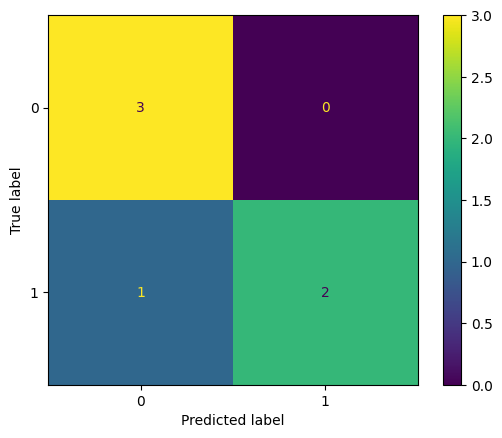

In [219]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [220]:
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0
5,middle,False,n,fair,no,0,0,0,1,0
6,middle,False,n,good,no,0,0,0,2,0
7,middle,True,y,good,yes,0,1,1,2,1
8,middle,False,y,excellent,yes,0,0,1,0,1
9,middle,False,y,excellent,yes,0,0,1,0,1


In [221]:
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]
y_predict = model.predict(X_input)
print(y_predict)

for i in y_predict:
    print('Result : {}'. format(class_names[i]))


[1 0 1 0]
Result : yes
Result : no
Result : yes
Result : no


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [222]:
model.feature_importances_

array([0.    , 0.3125, 0.    , 0.6875])

In [223]:
# ws06
# cols = ['age', 'employed', 'own_house', 'credit']
df_pred = pd.read_csv('data/simple_loan_predict.csv')
# df_pred = pd.read_csv('data/simple_loan_predict.csv', usecols=cols)

df_pred.head()

,id,name,age,employed,own_house,credit
0,101,Kob,middle,True,y,fair
1,102,Cala,old,False,n,good
2,103,Alex,old,True,n,fair
3,104,Tim,young,False,y,fair
4,105,Joy,middle,False,n,fair


In [224]:
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df_pred, feature_columns)
df_pred.head()

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_
0,101,Kob,middle,True,y,fair,0,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2
2,103,Alex,old,True,n,fair,1,1,0,1
3,104,Tim,young,False,y,fair,2,0,1,1
4,105,Joy,middle,False,n,fair,0,0,0,1


In [225]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X_input = df_pred[enc_columns] 
X_input.head()

,age_,employed_,own_house_,credit_
0,0,1,1,1
1,1,0,0,2
2,1,1,0,1
3,2,0,1,1
4,0,0,0,1


In [226]:
y_predict = model.predict(X_input)
df_pred['predict'] = y_predict
df_pred

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_,predict
0,101,Kob,middle,True,y,fair,0,1,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2,0
2,103,Alex,old,True,n,fair,1,1,0,1,1
3,104,Tim,young,False,y,fair,2,0,1,1,0
4,105,Joy,middle,False,n,fair,0,0,0,1,0
5,106,Jib,middle,False,y,excellent,0,0,1,0,1


In [227]:
df_pred['result'] = class_names[df_pred.predict]
columns = ['id','name','age','employed','own_house','credit','result']
print('Result...')
df_pred[columns]

Result...


,id,name,age,employed,own_house,credit,result
0,101,Kob,middle,True,y,fair,yes
1,102,Cala,old,False,n,good,no
2,103,Alex,old,True,n,fair,yes
3,104,Tim,young,False,y,fair,no
4,105,Joy,middle,False,n,fair,no
5,106,Jib,middle,False,y,excellent,yes


In [228]:
import pandas as pd

filepath = 'loan_result.xlsx'

# ใช้ context manager เพื่อจัดการ ExcelWriter
with pd.ExcelWriter(filepath, engine='openpyxl') as writer:
    df_pred[columns].to_excel(writer, sheet_name='MySheet1', index=False)


In [229]:
# ws07
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8333333333333334

In [230]:
# ws08
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [231]:
for train_index, test_index in kf.split(X):
    print(train_index, test_index)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 11 12 13 14 15 16] [ 8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 14 15 16] [11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14 15 16]


In [232]:
# ws09
from sklearn.model_selection import cross_val_score

In [233]:
model = DecisionTreeClassifier(max_depth=3)

cvs = cross_val_score(model, X, y, cv=5)
cvs

array([1.        , 1.        , 0.66666667, 1.        , 0.66666667])

In [234]:
cvs.mean().round(4)

np.float64(0.8667)

In [236]:
model = DecisionTreeClassifier(max_depth=1)
model

DecisionTreeClassifier(max_depth=1)